# Assistants API - Knowledge Retrieval

https://platform.openai.com/docs/assistants/tools/knowledge-retrieval

https://community.openai.com/t/new-assistants-api-a-potential-replacement-for-low-level-rag-style-content-generation/475677

Watch:

https://youtu.be/5rcjGjgJNQc?t=600&si=d9OtX0nMi2Rv0fQV

References:

https://community.openai.com/t/assistants-api-retrieval-pricing-how-much-does-this-cost/485188/8

https://medium.com/madhukarkumar/what-does-openais-announcement-mean-for-retrieval-augmented-generation-rag-and-vector-only-54bfc34cba2c

https://www.youtube.com/watch?v=ClfyQNkTeUc

https://www.pinecone.io/learn/assistants-api-canopy/

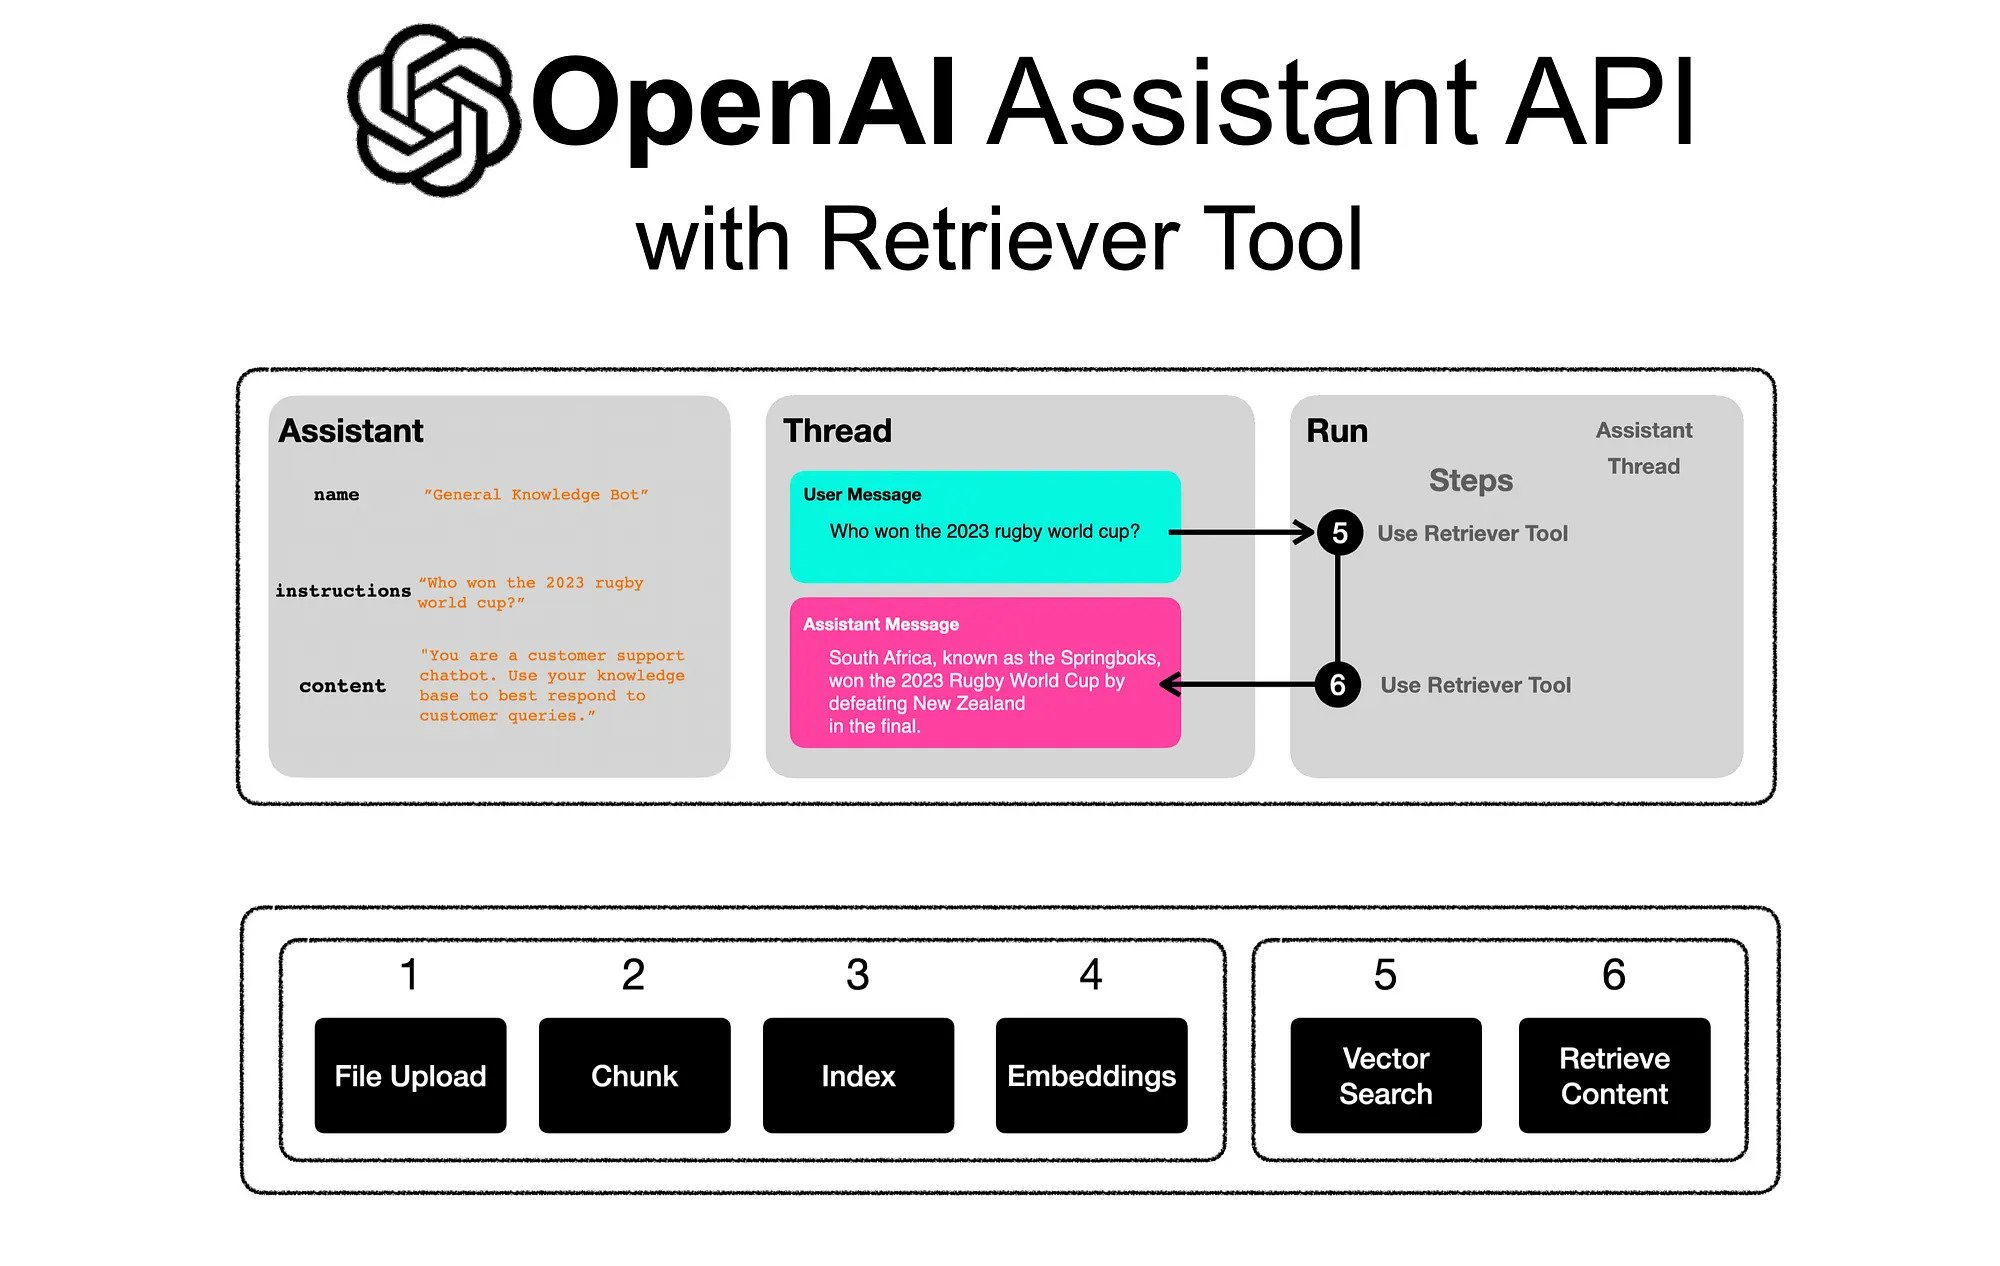

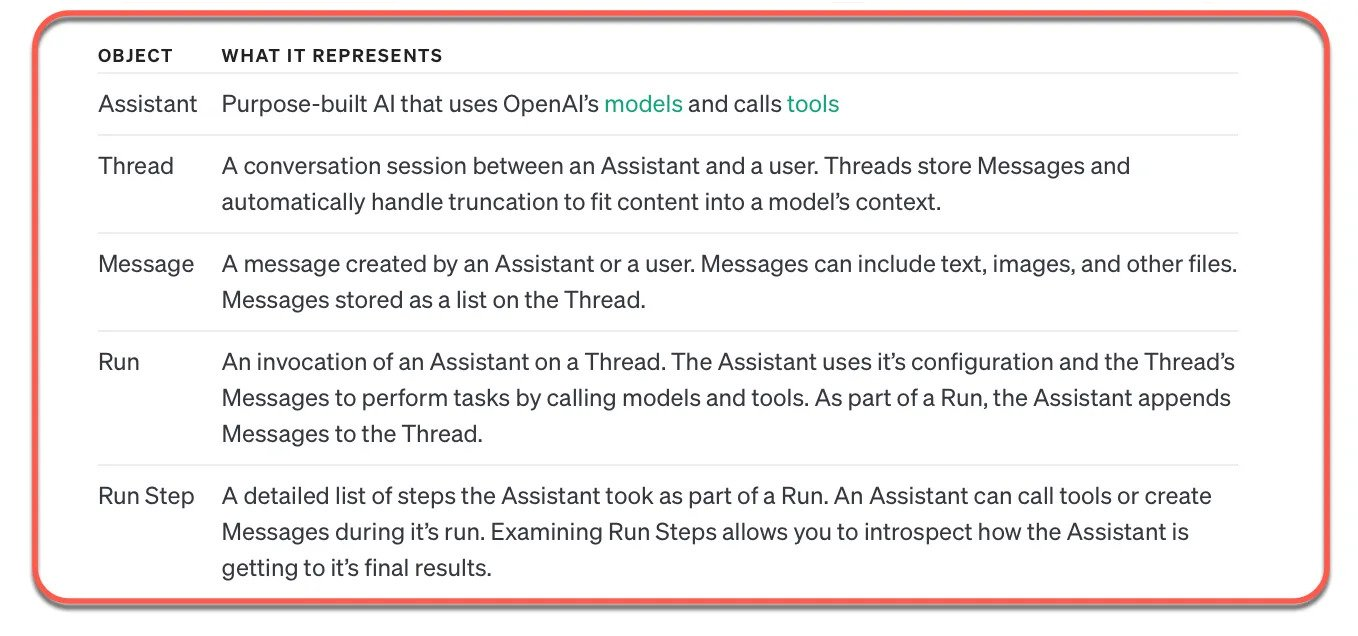

https://cobusgreyling.medium.com/openai-assistant-with-retriever-tool-08e9158ca900

In [24]:
from openai import OpenAI
import json
from dotenv import load_dotenv, find_dotenv

_ : bool = load_dotenv(find_dotenv()) # read local .env file


In [25]:
client: OpenAI = OpenAI()

# Knowledge Retrieval

Retrieval augments the Assistant with knowledge from outside its model, such as proprietary product information or documents provided by your users. Once a file is uploaded and passed to the Assistant, OpenAI will automatically chunk your documents, index and store the embeddings, and implement vector search to retrieve relevant content to answer user queries.

https://platform.openai.com/docs/assistants/tools/knowledge-retrieval

# How it works

The model then decides when to retrieve content based on the user Messages. The Assistants API automatically chooses between two retrieval techniques:

* it either passes the file content in the prompt for short documents, or
*  performs a vector search for longer documents

Retrieval currently optimizes for quality by adding all relevant content to the context of model calls. We plan to introduce other retrieval strategies to enable developers to choose a different tradeoff between retrieval quality and model usage cost.

https://platform.openai.com/docs/assistants/tools/how-it-works

In [26]:
# Step 1: Upload the file and Create an Assistant
from openai.types.beta import Assistant

# Upload a file with an "assistants" purpose
file = client.files.create(
    file=open("zia_profile.pdf","rb"),
    purpose="assistants"
)

print(file)

FileObject(id='file-kksswof2T6tOO04WBeylqaM5', bytes=48802, created_at=1701783893, filename='zia_profile.pdf', object='file', purpose='assistants', status='processed', status_details=None)


In [27]:
assitant: Assistant = client.beta.assistants.create(
    name="Student Support Assistant",
    instructions="You are a student support chatbot. Use your knowledge base to best respond to student queries about Zia U. Khan",
    model="gpt-3.5-turbo-1106",
    tools=[{"tools":"retrieval"}],
    file_ids=[file.id]
)

# 2: Create a Thread

In [28]:
from openai.types.beta.thread import Thread
thread: Thread = client.beta.threads.create()
print(thread)

Thread(id='thread_X6wesN52d6NRUvgmhtd1PhPu', created_at=1701783896, metadata={}, object='thread')


# Step 3: Add a Message to a Thread

In [29]:
from openai.types.beta.threads.thread_message import ThreadMessage
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="When and which city Zia U. khan was born?"
)

# Step 4: Run the Assistant


In [37]:
from openai.types.beta.threads.run import Run
run: Run = client.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assitant.id,
    instructions="Please address the user as Pakistani. The user is the student of PIAIC."
)


# Step 5: Check the Run status

In [39]:
run: Run = client.beta.threads.runs.retrieve(
    thread_id=thread.id,
    run_id=run.id
)
print(run)

Run(id='run_SRrvGYKauBD87b9WdNbqFlS0', assistant_id='asst_XdWSGC4Euq0vw8IKOV6w93Kj', cancelled_at=None, completed_at=None, created_at=1701784855, expires_at=None, failed_at=1701784864, file_ids=['file-kksswof2T6tOO04WBeylqaM5'], instructions='Please address the user as Pakistani. The user is the student of PIAIC.', last_error=LastError(code='rate_limit_exceeded', message='Rate limit reached for gpt-3.5-turbo-1106 in organization org-Nmz98xZ3cvWHuZktakbQhFJq on requests per min (RPM): Limit 3, Used 3, Requested 1. Please try again in 20s. Visit https://platform.openai.com/account/rate-limits to learn more. You can increase your rate limit by adding a payment method to your account at https://platform.openai.com/account/billing.'), metadata={}, model='gpt-3.5-turbo-1106', object='thread.run', required_action=None, started_at=1701784855, status='failed', thread_id='thread_X6wesN52d6NRUvgmhtd1PhPu', tools=[ToolAssistantToolsCode(type='code_interpreter')])


# Step 6: Display the Assistant's Response

In [40]:
# from openai.resources.beta.threads.messages.messages import SyncCursorPage 

messages: list[ThreadMessage] = client.beta.threads.messages.list(
    thread_id=thread.id
)

for m in reversed(messages.data):
    print(m.role + ": " + m.content[0].text.value)

user: When and which city Zia U. khan was born?
assistant: It seems that I've encountered an issue while trying to access the file. Let me try again to load the dataset and retrieve the information about Zia U. Khan's birth city and date.
